<a href="https://colab.research.google.com/github/rar3mar/Coursera_Capstone/blob/master/C1W4_MIPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Центральная предельная теорема своими руками
В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.


In [50]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

Возьмем распределение $\chi^2$ (хи-квадрат)

In [51]:
rv = sts.chi2(5) #k = 5 - это натуральный параметр, который называется числом степеней свободы


 Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

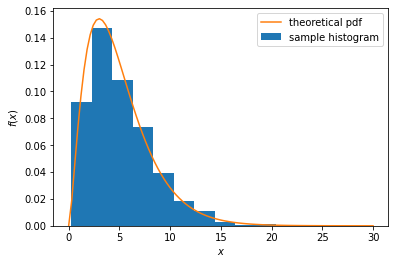

In [52]:
sample = rv.rvs(1000)             # генеруем выборку объема 1000

x = np.linspace(0,30,100)         #определяем массив точек для построения плотности распределения

pdf = rv.pdf(x)                   #вычисляем значения плотности распределения от выборки
plt.hist(sample, density=True, label='sample histogram') #гистограмма


# построим гистограмму выборки и наложим на нее теоретическую  оценку плотности вероятности распределения хи-квадрат
plt.plot(x, pdf, label='theoretical pdf')
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

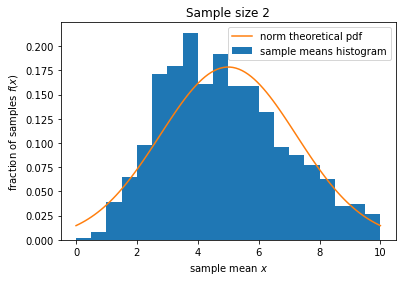

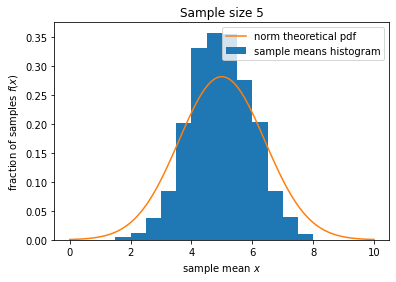

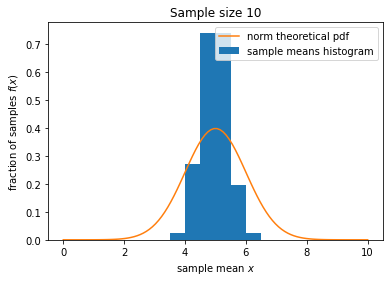

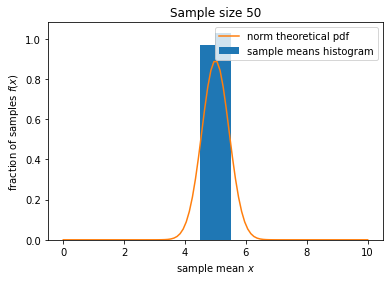

In [53]:
for n in [2, 5, 10, 50]:                                         # выборки размера n
    sample_means = []                                            # сдеднее из 1000 выборок
    for rvn in range(1000):                                      # цикл генерации случайных выборок количества n из функции     
        sample_means.append(rv.rvs(n).mean())                    # метод mean покажет среднее арифметическое данной функции                                 

    plt.hist(sample_means, 20, density=True, range=[0, 10], label='sample means histogram')

    rv = sts.norm(5, np.sqrt(2.*5./n))                    # вычисляется pdf нормального распределения с данными параметрами 
    
    x = np.linspace(0, 10, 100)                           # расчитаем теоритеческую плотность вероятности для распределения
    pdf = rv.pdf(x)
    
    plt.plot(x, pdf, label='norm theoretical pdf')

    plt.legend()
    plt.title("Sample size %d" % n)
    plt.ylabel('fraction of samples $f(x)$')
    plt.xlabel('sample mean $x$')
    plt.show()


##Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

Из графиков виждно, что чем больше объем выборки n, тем точнее распределение
средних значений начинает приближаться к 5. В итоге можно сказать, что 
при увеличении объема выборки n распределение выборочных средних все более соответствует приближающему его нормальному распределению.